# BBM409 Assignment_0

Group Member: Toprak Cemre Hanbay



In [2]:
""" import necessary libraries"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
""" upload dataset from your PC, you can use different methods"""
df=pd.read_csv("star_classification.csv")

## Pre-processing

In [4]:
df.isnull().sum()
#no null values




obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [5]:
df.duplicated().sum()
#no duplicated values



np.int64(0)

In [6]:
df.describe()
#no outliers

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [7]:
df = df.drop(["obj_ID", "spec_obj_ID", "run_ID", "rerun_ID",
                  "cam_col", "field_ID", "plate", "MJD", "fiber_ID"], axis=1)
#drop unnecessary columns for model training

These columns do not have any mathematical or physical meaning; they are just identification numbers. They could cause the model to work incorrectly, which is why we remove them.

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
#convert class to numerical values
df.head()


,alpha,delta,u,g,r,i,z,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,0,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,0,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,0,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,0,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,0,0.116123


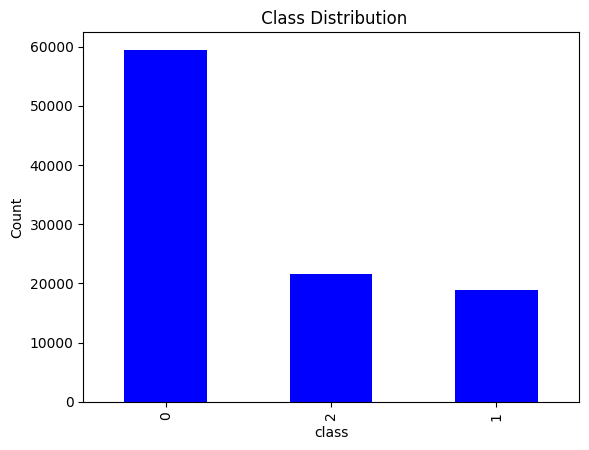

In [9]:
df["class"].value_counts().plot(kind='bar', color='blue')
plt.title(" Class Distribution")
plt.ylabel("Count")
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler

X = df.drop("class", axis=1)
y = df["class"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#scale the features for better performance

This method removes the class column to obtain only the features and takes the class column as the label. Then, through data scaling, it brings all features to the same scale, ensuring that no feature is larger or smaller than another.

Explain why you use those methods, etc.

## Split the dataset

80% training & 20% test  or 5-fold cross validation

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#split the dataset into training and test sets %80 train, %20 test
 



## Classification Methods

In this homework, we use kNN, Naive Bayes ...

### kNN

In [ ]:
# import KNeighbors Classifier from sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5,weights="distance") #weights="distance" gives more weight to closer neighbors and less weight to farther ones.
model.fit(X_train, y_train) #fit the model
y_pred = model.predict(X_test) #prediction
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
error_rate = 1 - accuracy

metricsknn={"Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1 Score":f1,"Error Rate":error_rate}
metricsknn_df=pd.DataFrame(metricsknn,index=["KNN"])
metricsknn_df






,Accuracy,Precision,Recall,F1 Score,Error Rate
KNN,0.94465,0.943903,0.933668,0.938297,0.05535


Explain your results, draw plots, tables etc.

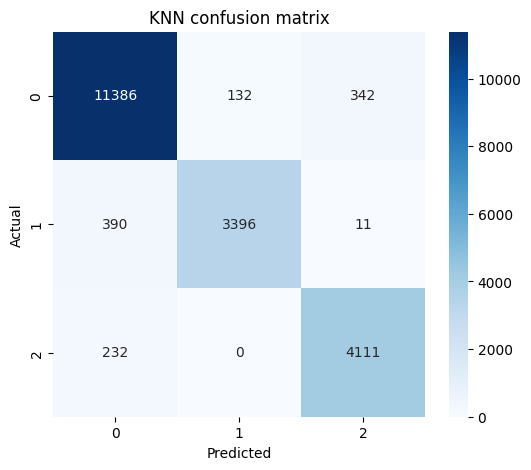

In [13]:

confmatrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(confmatrix,annot=True,fmt="d",cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN confusion matrix")
plt.show()


According to the confusion matrix, the k-NN model correctly predicted 11,386 of the samples with a true class value of 0, 3,396 of the samples with a true class value of 1, and 4,111 of the samples with a true class value of 2.

### Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
modelnb=GaussianNB()
modelnb.fit(X_train,y_train)
y_pred_modelnb=modelnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_modelnb)
precision = precision_score(y_test, y_pred_modelnb, average='macro')
recall = recall_score(y_test, y_pred_modelnb, average='macro')
f1 = f1_score(y_test, y_pred_modelnb, average='macro')
error_rate = 1 - accuracy

metricsnb={"Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1 Score":f1,"Error Rate":error_rate}
metricsnb_df=pd.DataFrame(metricsnb,index=["Naive Bayes"])
metricsnb_df



,Accuracy,Precision,Recall,F1 Score,Error Rate
Naive Bayes,0.74155,0.802836,0.64601,0.613055,0.25845


Explain your results, draw plots, tables etc.

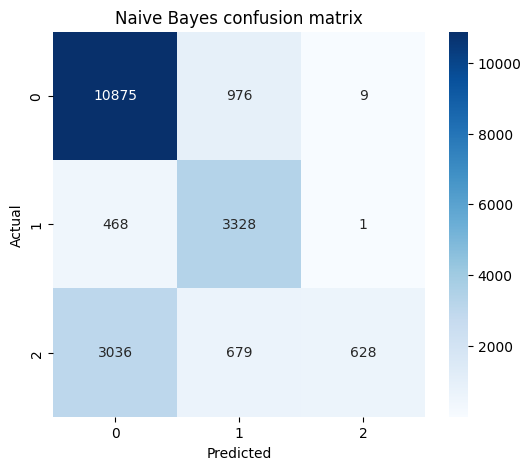

In [15]:
confmatrixnb=confusion_matrix(y_test,y_pred_modelnb)
plt.figure(figsize=(6,5))
sns.heatmap(confmatrixnb,annot=True,fmt="d",cmap="Blues", xticklabels=modelnb.classes_, yticklabels=modelnb.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes confusion matrix")
plt.show()

According to the confusion matrix, the Naive Bayes model correctly predicted 10,875 of the samples with a true class value of 0, 3,328 of the samples with a true class value of 1, and 628 of the samples with a true class value of 2.


### Random Forest

In [ ]:
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestClassifier
modelrf=RandomForestClassifier(n_estimators=100,random_state=42)
modelrf.fit(X_train,y_train)
y_predrf=modelrf.predict(X_test)
accuracy = accuracy_score(y_test, y_predrf)
precision = precision_score(y_test, y_predrf, average='macro')
recall = recall_score(y_test, y_predrf, average='macro')
f1 = f1_score(y_test, y_predrf, average='macro')
error_rate = 1 - accuracy
metricsrf={"Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1 Score":f1,"Error Rate":error_rate}
metricsrf_df=pd.DataFrame(metricsrf,index=["Random Forest"])
metricsrf_df



,Accuracy,Precision,Recall,F1 Score,Error Rate
Random Forest,0.97735,0.977796,0.969553,0.973501,0.02265


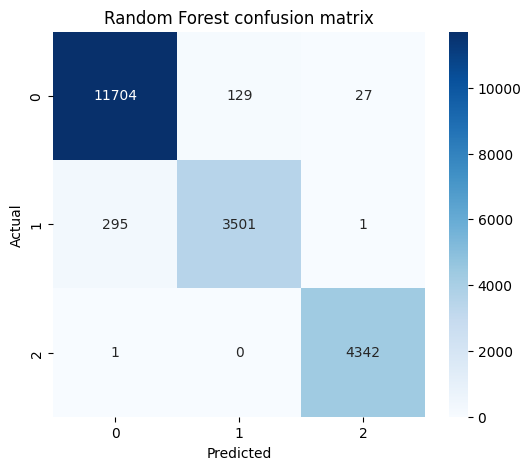

In [17]:
confmatrixrf=confusion_matrix(y_test,y_predrf)
plt.figure(figsize=(6,5))
sns.heatmap(confmatrixrf,annot=True,fmt="d",cmap="Blues", xticklabels=modelrf.classes_, yticklabels=modelrf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest confusion matrix")
plt.show()

According to the confusion matrix, the Random Forest model correctly predicted 11,704 of the samples with a true class value of 0, 3,501 of the samples with a true class value of 1, and 4,342 of the samples with a true class value of 2.

### SVM

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf')  # rbf kernel kullanımı non-linear veriler için iyi
svm.fit(X_train, y_train)
y_predsvm = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_predsvm)
precision = precision_score(y_test, y_predsvm, average='macro')
recall = recall_score(y_test, y_predsvm, average='macro')
f1 = f1_score(y_test, y_predsvm, average='macro')
error_rate = 1 - accuracy
metricssvm={"Accuracy":accuracy,"Precision":precision,"Recall":recall,"F1 Score":f1,"Error Rate":error_rate}
metricssvm_df=pd.DataFrame(metricssvm,index=["SVM"])
metricssvm_df



,Accuracy,Precision,Recall,F1 Score,Error Rate
SVM,0.95825,0.955288,0.951949,0.952732,0.04175


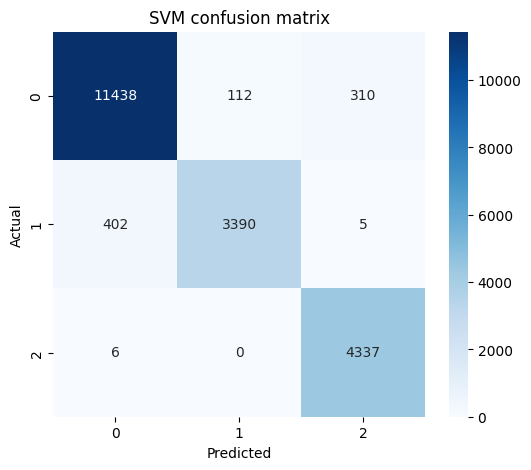

In [19]:
confmatrixsvm=confusion_matrix(y_test,y_predsvm)
plt.figure(figsize=(6,5))
sns.heatmap(confmatrixsvm,annot=True,fmt="d",cmap="Blues", xticklabels=svm.classes_, yticklabels=svm.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM confusion matrix")
plt.show()

According to the confusion matrix, the k-NN model correctly predicted 11,438 of the samples with a true class value of 0, 3,390 of the samples with a true class value of 1, and 3,337 of the samples with a true class value of 2.

In [20]:
metrics_df=pd.DataFrame([metricsknn,metricsnb,metricsrf,metricssvm],index=["KNN","Naive Bayes","Random Fores","SVM"])
metrics_df

,Accuracy,Precision,Recall,F1 Score,Error Rate
KNN,0.94465,0.943903,0.933668,0.938297,0.05535
Naive Bayes,0.74155,0.802836,0.646010,0.613055,0.25845
Random Fores,0.97735,0.977796,0.969553,0.973501,0.02265
SVM,0.95825,0.955288,0.951949,0.952732,0.04175


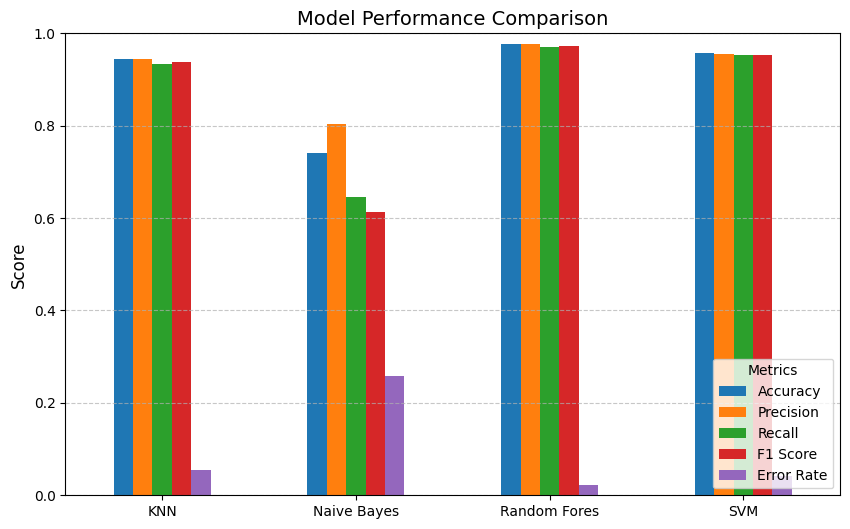

In [ ]:

metrics_df.plot(kind="bar", figsize=(10,6))
plt.title("Model Performance Comparison", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.ylim(0, 1)  # 0 ile 1 arasında sınırla
plt.xticks(rotation=0)
plt.legend(title="Metrics", loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

 According to this graph, among the four models used, the Random Forest model demonstrates the best overall performance, meaning that the accuracy of its predictions is higher than the others.

In addition to this table, when we examine the confusion matrices above, we can see that the Random Forest model is the best-performing one.